In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('insurance.csv')

In [9]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [11]:
df.shape

(1340, 10)

In [12]:
pd.set_option('display.float_format','{:.2f}'.format)

In [13]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [14]:
sns.set(style='whitegrid',palette='Set2',font_scale=1.1)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(1332, 10)

In [19]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [20]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


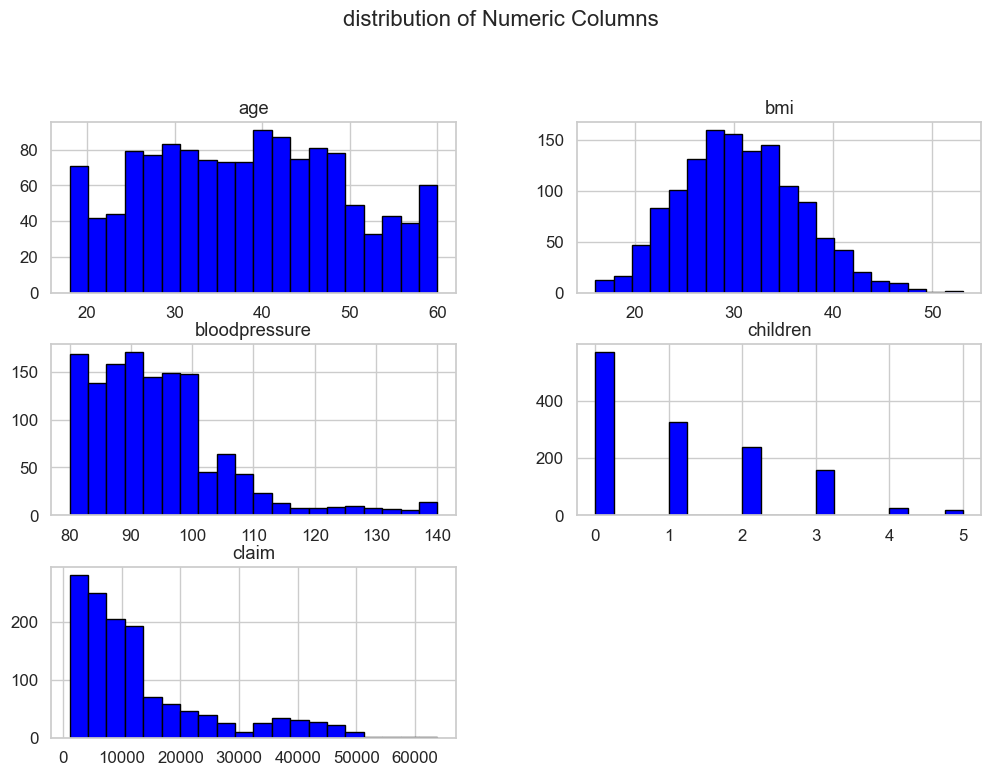

In [21]:
numeric_cols = ['age','bmi','bloodpressure','children','claim']
df[numeric_cols].hist(figsize=(12,8),bins=20,color='blue',edgecolor = 'black')
plt.suptitle('distribution of Numeric Columns',y=1.02,fontsize=16)
plt.show()

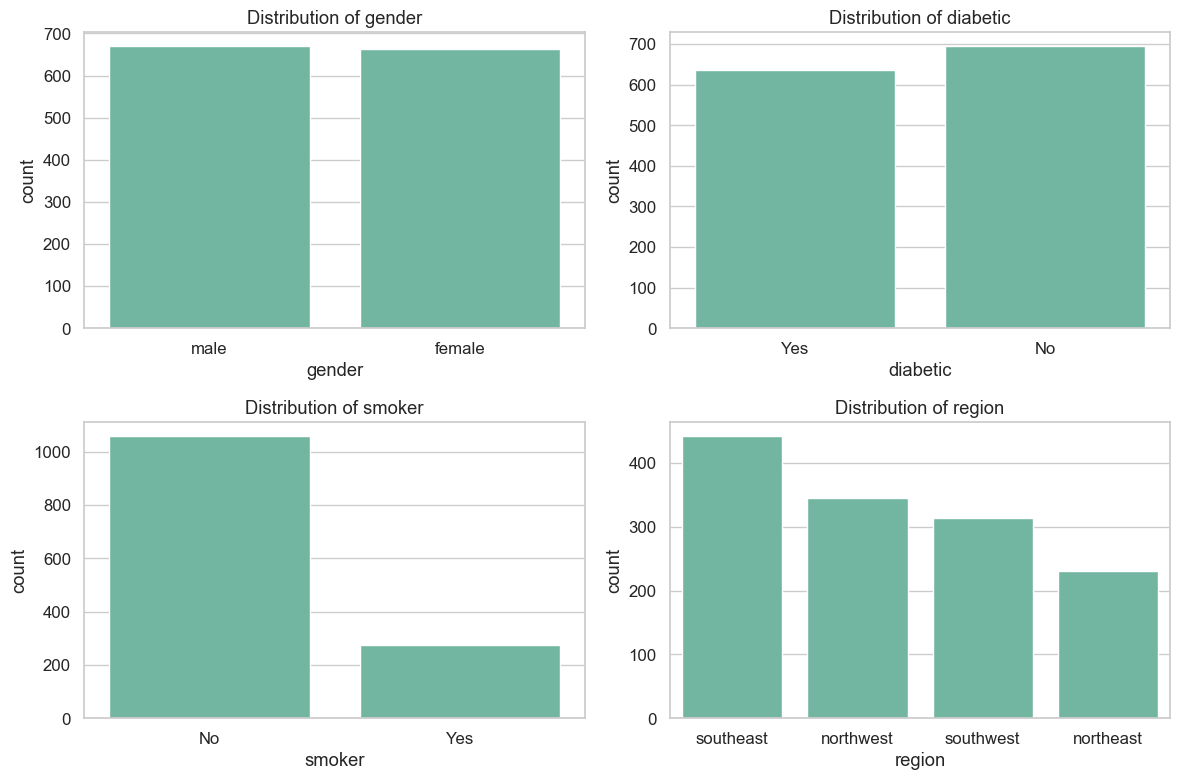

In [22]:
cat_cols = ['gender','diabetic','smoker','region']
plt.figure(figsize=(12,8))
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [23]:
df.groupby(['gender','smoker'])['claim'].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

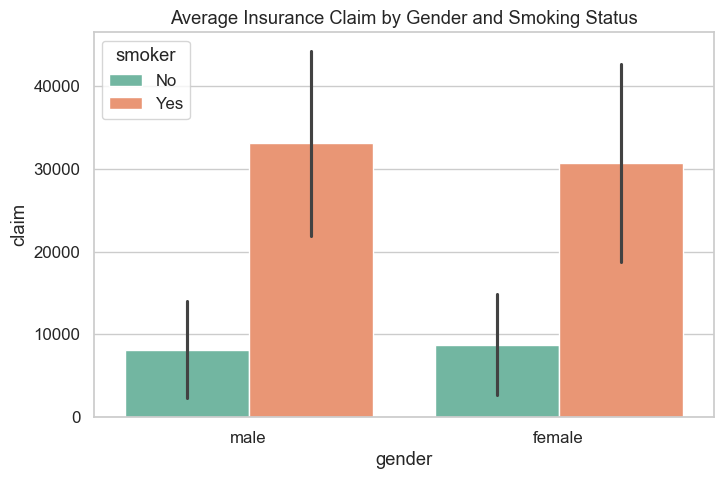

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='claim',hue='smoker',estimator='mean',errorbar='sd')
plt.title('Average Insurance Claim by Gender and Smoking Status')
plt.show()



In [25]:
pivot_region_diabetic = df.groupby(['region','diabetic'])['claim'].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


Text(0, 0.5, 'Average Claim')

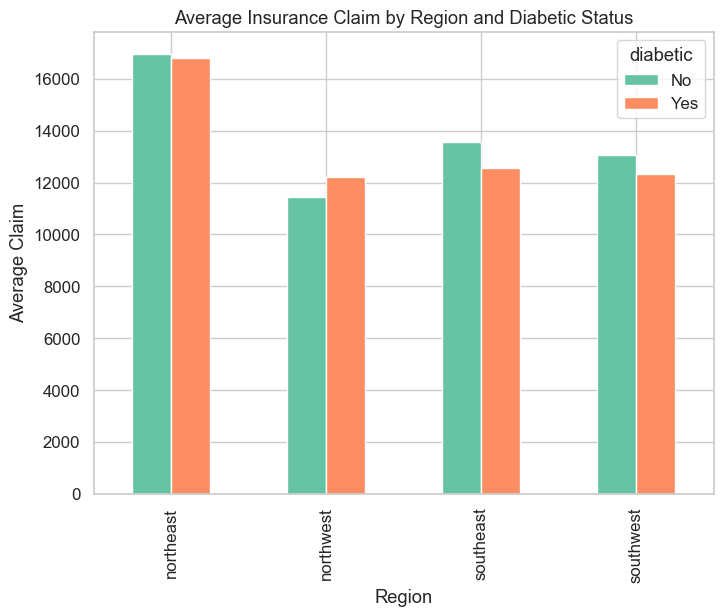

In [26]:
pivot_region_diabetic.plot(kind='bar',figsize=(8,6))
plt.title('Average Insurance Claim by Region and Diabetic Status')
plt.xlabel('Region')
plt.ylabel('Average Claim')

In [27]:
pivot_table = pd.pivot_table(df,values='claim',index='region',columns='smoker',aggfunc='mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [28]:
pivot_table = pd.pivot_table(df,values='claim',index='children',columns='diabetic',aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [29]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

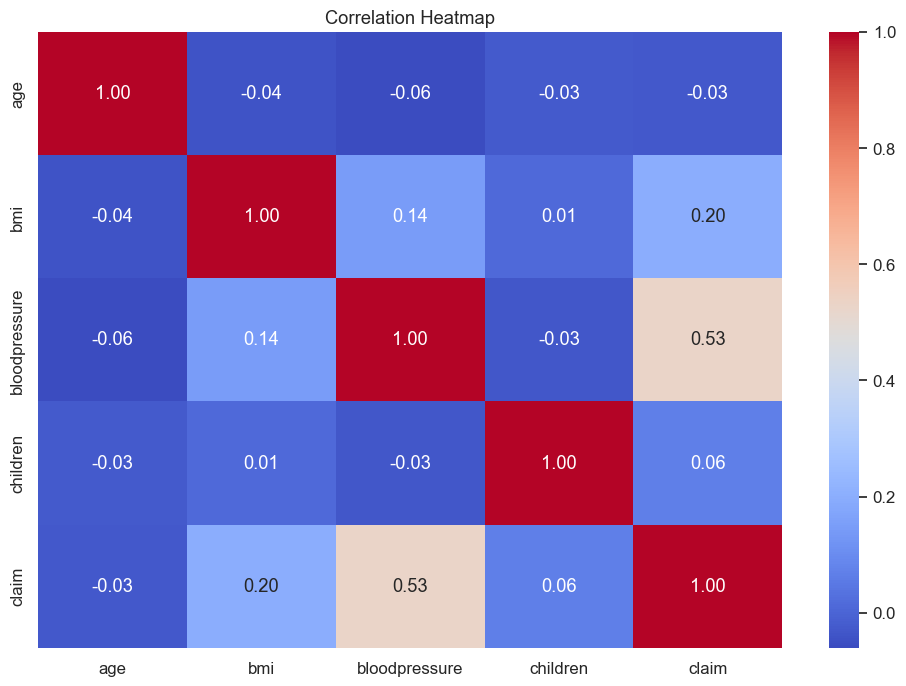

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

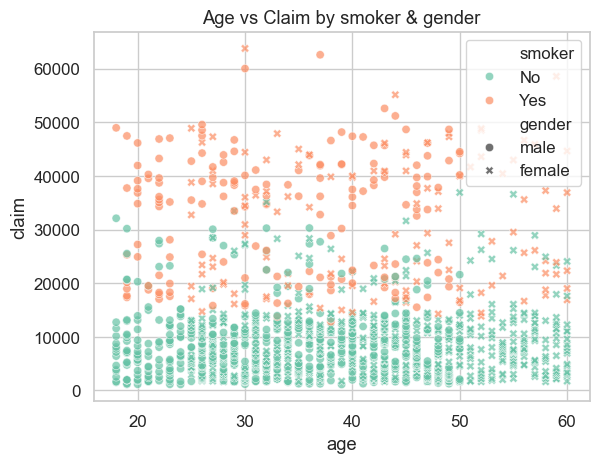

In [31]:
sns.scatterplot(data=df,x='age',y='claim',hue='smoker',style='gender',alpha=0.7)
plt.title('Age vs Claim by smoker & gender')
plt.show()


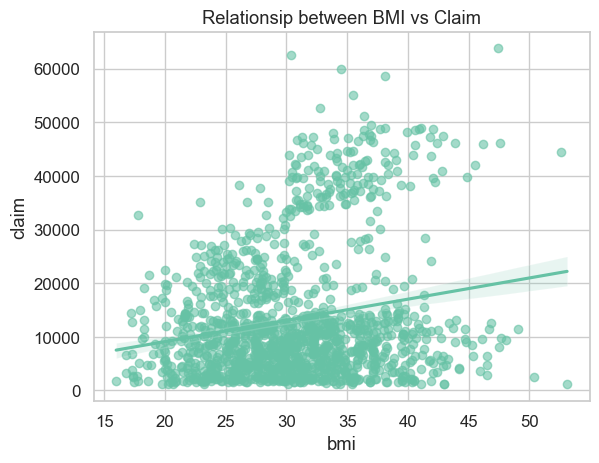

In [32]:
sns.regplot(data=df,x='bmi',y='claim',scatter_kws={'alpha':0.6})
plt.title('Relationsip between BMI vs Claim')
plt.show()

Text(0.5, 1.0, 'Claim Distribution by number of Children')

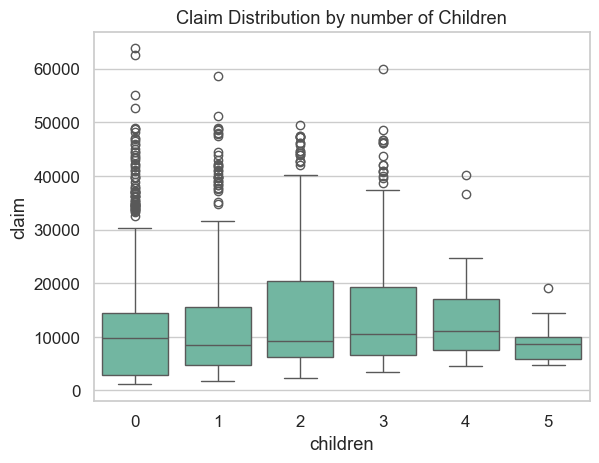

In [33]:
sns.boxplot(data=df,x='children',y='claim')
plt.title('Claim Distribution by number of Children')

In [34]:
df['age_group'] = pd.cut(df['age'],bins=[0,18,30,45,60,100],labels=['<18','18-30','31-45','46-60','>60'])

In [35]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [36]:
df['age_group'].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
>60        0
Name: count, dtype: int64

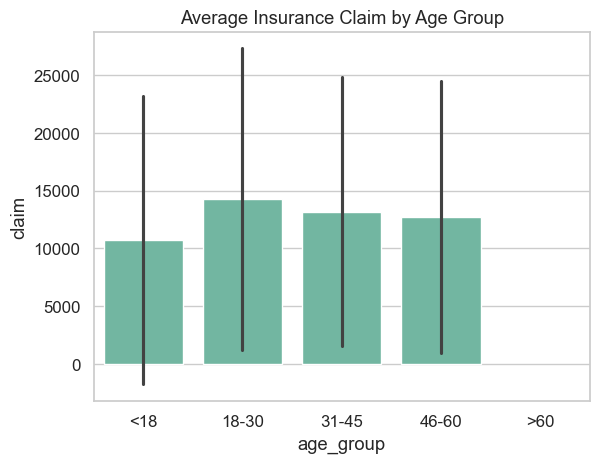

In [37]:
sns.barplot(data=df,x='age_group',y='claim',estimator='mean',errorbar='sd')
plt.title('Average Insurance Claim by Age Group')
plt.show()

In [38]:
df['bmi_category'] = pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,100], labels = ['Underweight','Normal','Overweight','Obese'])

In [39]:
df['bmi_category'].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

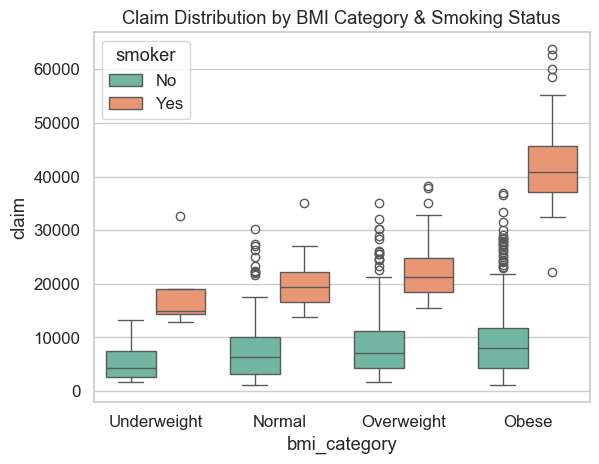

In [40]:
sns.boxplot(data=df,x='bmi_category',y='claim',hue = "smoker")
plt.title('Claim Distribution by BMI Category & Smoking Status')
plt.show()

In [41]:
region_stats = df.groupby('region').agg(
    smoker_rate = ('smoker',lambda x: (x=='Yes').mean()*100),
    mean_claim = ('claim','mean'),
).reset_index()
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


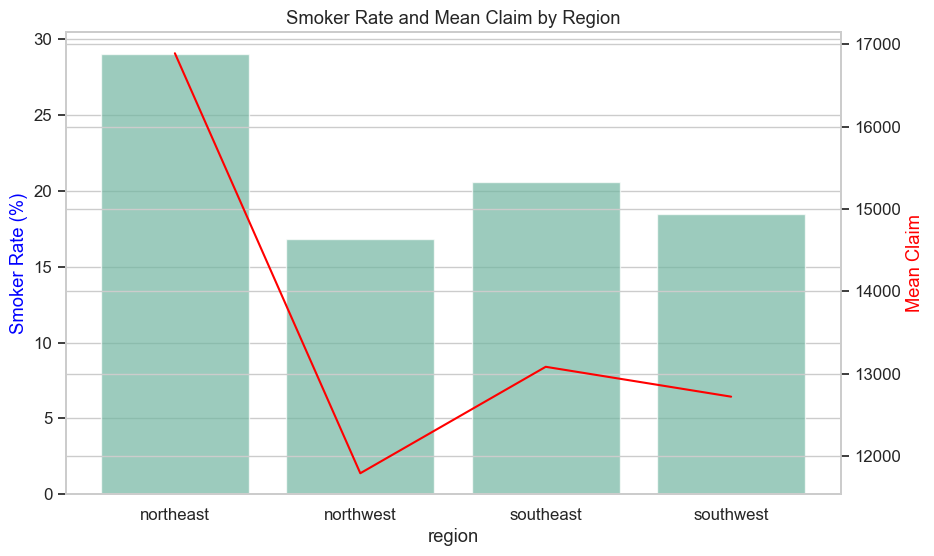

In [42]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=region_stats,x='region',y='smoker_rate',ax=ax1,alpha=0.7)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats,x='region',y='mean_claim',ax=ax2,color='red')
ax1.set_ylabel('Smoker Rate (%)',color='blue')
ax2.set_ylabel('Mean Claim',color='red')
plt.title('Smoker Rate and Mean Claim by Region')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [44]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_category
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45,Normal
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,18-30,Obese
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,18-30,Obese
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,18-30,Obese
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,18-30,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45,Obese
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60,Obese
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,18-30,Obese
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45,Obese


In [45]:
X = df[['age','gender','bmi','bloodpressure','diabetic','children','smoker']]
y = df['claim']

In [46]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [47]:
cat_cols = ['gender','diabetic','smoker']
label_encoders = {}

In [48]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f'label_encoder_{col}.pkl')

C:\Users\Supuni Tharushika\AppData\Local\Temp\ipykernel_10712\85924466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Supuni Tharushika\AppData\Local\Temp\ipykernel_10712\85924466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\Supuni Tharushika\AppData\Local\Temp\ipykernel_10712\85924466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [49]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [50]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
numeric_cols = ['age','bmi','bloodpressure','children']
scaler = StandardScaler()

In [53]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [54]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [55]:
print(X_train.shape)
print(X_test.shape)

(1065, 7)
(267, 7)


In [56]:
print(y_train.shape)
print(y_test.shape)

(1065,)
(267,)


In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from xgboost import XGBRegressor

In [58]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return {"R2":r2,"MAE": mae,"RMSE": rmse}

In [59]:
results = {}

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)
results['Linear Regression'] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  poly_lr = LinearRegression()
  poly_lr.fit(X_train_poly, y_train)

  score = poly_lr.score(X_test_poly, y_test)
  if score > best_poly_score:
    best_poly_score = score
    best_poly_model = (degree, poly, poly_lr)

  degree, poly, poly_lr = best_poly_model
  results[f'Polynomial Regression (degree {degree})'] = evaluate_model(poly_lr,poly.fit_transform(X_train),poly.transform(X_test),y_train,y_test)
  print(f"Polynomial Regression models are trained")

  rf = RandomForestRegressor()

  rf_params = {
      'n_estimators': [100,200],
      'max_depth': [None,10,20],
      'min_samples_split': [2,5],
      'min_samples_leaf': [1,2]
  }

  rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1,verbose=0)
  rf_grid.fit(X_train, y_train)
  best_rf = rf_grid.best_estimator_

  results['Random Forest'] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
  print("Random Forest model trained. Best Parameters: ",rf_grid.best_params_)

  svr = SVR()
  svr_params = {
      "kernel": ["linear","poly", "rbf"],
      "C": [1,10,50],
      'epsilon': [0.1,0.2,0.5],
      'degree': [2,3]
  }

  svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='r2', n_jobs=-1,verbose=0)
  svr_grid.fit(X_train, y_train)
  best_svr = svr_grid.best_estimator_
  results['SVR'] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)
  print("SVR model trained. Best Parameters: ",svr_grid.best_params_)

  xgb = XGBRegressor(objective='reg:squarederror')
  xgb_params = {
      'n_estimators': [100,200],
      'max_depth': [3,5,7],
      'learning_rate': [0.01,0.05,0.1],
      'subsample': [0.8,1.0],

  }

  xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1,verbose=0)
  xgb_grid.fit(X_train, y_train)
  best_xgb = xgb_grid.best_estimator_
  results['XGBoost'] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)
  print("XGBoost model trained. Best Parameters: ",xgb_grid.best_params_)





Linear Regression model trained
Polynomial Regression models are trained
Random Forest model trained. Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
SVR model trained. Best Parameters:  {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost model trained. Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Polynomial Regression models are trained
Random Forest model trained. Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR model trained. Best Parameters:  {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost model trained. Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [61]:
results

{'Linear Regression': {'R2': 0.7186402865210724,
  'MAE': 5034.263198897407,
  'RMSE': np.float64(6368.137982018984)},
 'Polynomial Regression (degree 2)': {'R2': 0.7757814325424963,
  'MAE': 4426.321815178741,
  'RMSE': np.float64(5684.827554251739)},
 'Random Forest': {'R2': 0.8225531993777495,
  'MAE': 3883.0572799038114,
  'RMSE': np.float64(5057.263648121309)},
 'SVR': {'R2': 0.4979929465562679,
  'MAE': 5916.9074098768515,
  'RMSE': np.float64(8506.21622300923)},
 'XGBoost': {'R2': 0.8323172161437656,
  'MAE': 3820.3895535975535,
  'RMSE': np.float64(4916.157026030382)}}

In [62]:
results_df = pd.DataFrame(results).T.sort_values(by='R2',ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.83,3820.39,4916.16
Random Forest,0.82,3883.06,5057.26
Polynomial Regression (degree 2),0.78,4426.32,5684.83
Linear Regression,0.72,5034.26,6368.14
SVR,0.50,5916.91,8506.22


In [63]:
models = {
    'Linear Regression': lr,
    'Polynomial Regression': best_poly_model,
    'Random Forest': best_rf,
    'SVR': best_svr,
    'XGBoost': best_xgb
}

In [64]:
best_r2 = results_df["R2"].max()

In [65]:
best_r2

np.float64(0.8323172161437656)

In [66]:
top_models = results_df[results_df["R2"] == best_r2]


In [67]:
top_models

,R2,MAE,RMSE
XGBoost,0.83,3820.39,4916.16


In [68]:
best_model = models[top_models.index[0]]

In [69]:
best_model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [70]:
joblib.dump(best_model,'best_model.pkl')
print(f"Best model selected:{top_models.index[0]}")

Best model selected:XGBoost
